# CMPE 482 ASSIGNMENT 1

**Name:** Orhun Görkem  
**Student ID:** 2017400171  

## QUESTION 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def gram_schmidt(matrix):
    orthonormal_basis=[]
    for i in range(len(matrix)):
        a = matrix[i]
        q = a
        for j in range(i):
            q = q - (orthonormal_basis[j] @ a) * orthonormal_basis[j]
        if np.all(q == 0):
            print("Linearly Dependent")
            return
        q = q / np.linalg.norm(q)
        orthonormal_basis.append(q)
    return np.array(orthonormal_basis)

Generating 5x5 matrix with random indices

In [3]:
X = np.array([np.array([np.random.normal() for i in range(5)]) for j in range(5)])

In QR factorization, the columns for Q matrix should be orthonormal, which can be provided using Gram Schmidt algorithm.

In [4]:
Q = gram_schmidt(X.T).T

As Q being an orthonormal matrix,  
$Q.Q^{T} = I$ should hold.

Since we want $ X = Q.R $ by factorizing,
$ X = I.X = Q.Q^{T}.X = Q.R $  
$R=Q^{T}.X$

In [5]:
R = Q.T@X

Let's check what we got:  
### a.  
$Q^{T}.Q = I$  should hold since Q is an orthonormal matrix.

In [6]:
(Q.T @ Q).round(5)

array([[ 1., -0., -0.,  0.,  0.],
       [-0.,  1.,  0., -0., -0.],
       [-0.,  0.,  1.,  0., -0.],
       [ 0., -0.,  0.,  1., -0.],
       [ 0., -0., -0., -0.,  1.]])

### b.  
$Q^{T}.Q = Q.Q^{T} = I$  

(Since $Q^T = Q^{-1}$)

In [7]:
(Q @ Q.T).round(5)

array([[ 1.,  0., -0.,  0.,  0.],
       [ 0.,  1.,  0., -0.,  0.],
       [-0.,  0.,  1.,  0.,  0.],
       [ 0., -0.,  0.,  1., -0.],
       [ 0.,  0.,  0., -0.,  1.]])

### c.
R is an upper triangular matrix.

In [8]:
R.round(5)

array([[ 1.88467,  0.29144,  0.49544, -0.12909, -0.02777],
       [-0.     ,  1.64487, -0.0184 ,  0.31723, -1.13943],
       [-0.     ,  0.     ,  2.26836,  0.33684,  2.81715],
       [ 0.     ,  0.     ,  0.     ,  2.14307,  0.08518],
       [ 0.     ,  0.     , -0.     , -0.     ,  0.52742]])

### d.  
Since we factorized $X$ into $Q$ and $R$,  
$ X = Q.R $  
$ Q.R - X = Q.R - Q.R = 0$

In [9]:
(Q@R - X).round(5)

array([[ 0.,  0., -0.,  0., -0.],
       [-0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -0., -0.],
       [-0., -0.,  0.,  0.,  0.],
       [-0., -0.,  0.,  0.,  0.]])

## QUESTION 2

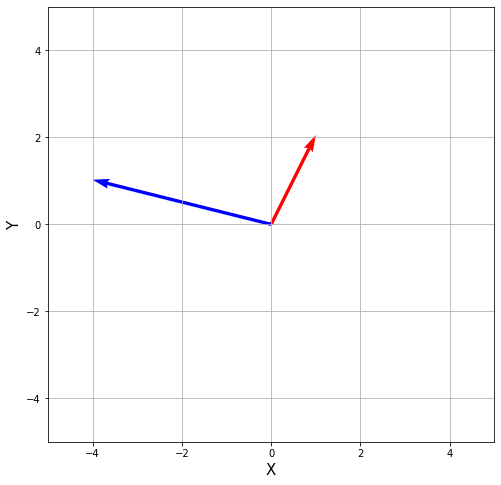

In [10]:
%matplotlib inline
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

x=np.linspace(-10,10,500)
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.xlim([-5,5])
plt.ylim([-5,5])
Y = np.array([[1,-4],[2,1]])
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, Y.T[:,0], Y.T[:,1], color=['r','b'], scale=10)
plt.grid()

In [11]:
Q1 = gram_schmidt(Y.T).T
Q1

array([[ 0.4472136 , -0.89442719],
       [ 0.89442719,  0.4472136 ]])

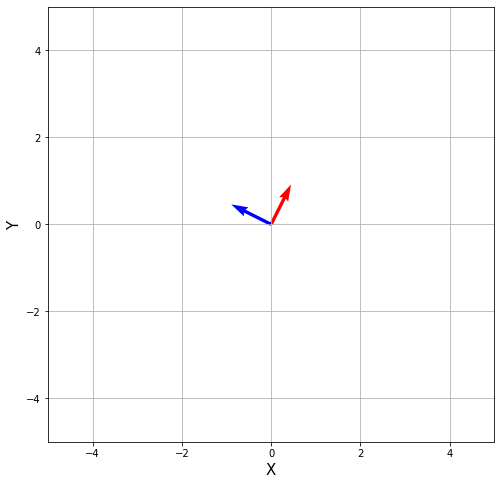

In [12]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

x=np.linspace(-10,10,500)
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.xlim([-5,5])
plt.ylim([-5,5])
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, Q1.T[:,0], Q1.T[:,1], color=['r','b'], scale=10)
plt.grid()


## QUESTION 3

In [13]:
H = [[(1/(i+j-1)) for i in range(1,201)] for j in range(1,201)]
H = np.array(H)
I = np.identity(200)
X = (10**-5)*I + H

We first apply the original Gram Schmidt algorithm to X.

In [14]:
Q1 = gram_schmidt(X.T).T
R1 = Q1.T@X

Now implementing the modified algorithm:

In [15]:
def modified_gram_schmidt(matrix):
    v = matrix
    R = np.zeros((len(matrix),len(matrix)))
    Q = np.zeros((len(matrix),len(matrix)))
    for i in range(len(matrix)):
        R[i][i] = np.linalg.norm(v[i])
        Q[i] = v[i]/R[i][i]
        for j in range(i+1,len(matrix)):
            R[i][j] = Q[i]@v[j]
            v[j] = v[j] - R[i][j]*Q[i]
            
    return Q,R
        
Q2, R2 = modified_gram_schmidt(X.T)

In [16]:
E1 = I - Q1.T @ Q1
E2 = I - Q2.T @ Q2
print("Max error with classical algorithm: "+str(max(abs(E1.max()),abs(E1.min()))))
print("Max error with modified algorithm: "+str(max(abs(E2.max()),abs(E2.min()))))

Max error with classical algorithm: 0.9999998536126823
Max error with modified algorithm: 1.5022586237078853e-11


Expectedly, classical algorithm caused more errors since the it conducts many risky subtructions successively, whereas the modified version changes the order of operations and makes subtruction more precisely. 

## QUESTION 4

In [17]:
from scipy.misc import derivative

Original function: $f(x)=x^2+2.e^x$

In [18]:
def f(x):
    return x**2 + 2*np.exp(x)

x = np.linspace(-2,2,401)
y = f(x)
index = np.where(x==0.5)  #index of x=0.5

Zeroth order Taylor approximation:  

$f(x)≈f(a)$

In [19]:
y0 = np.array([f(0.5) for i in range(401)])

First order Taylor approximation:  

$f(x)≈f(a)+f′(a)(x−a)$

In [20]:
dydx=derivative(f,x0=0.5,n=1,dx=1/100,order=5)
y1 = f(0.5) + dydx*(x-0.5)

Second order Taylor approximation:  

$f(x)≈f(a)+f′(a)(x−a) + \frac{1}{2}.f′′(a)(x−a)^2$

In [21]:
dydx2=derivative(f,x0=0.5,n=2,dx=1/100,order=5)
y2 = y1 + dydx2*((x-0.5)**2)/2

Third order Taylor approximation:  

$f(x)≈f(a)+f′(a)(x−a) + \frac{1}{2}.f′′(a)(x−a)^2 + \frac{1}{6}.f′′′(a)(x−a)^3$

In [22]:
dydx3=derivative(f,x0=0.5,n=3,dx=1/100,order=5)
y3 = y2 + dydx3*((x-0.5)**3)/6

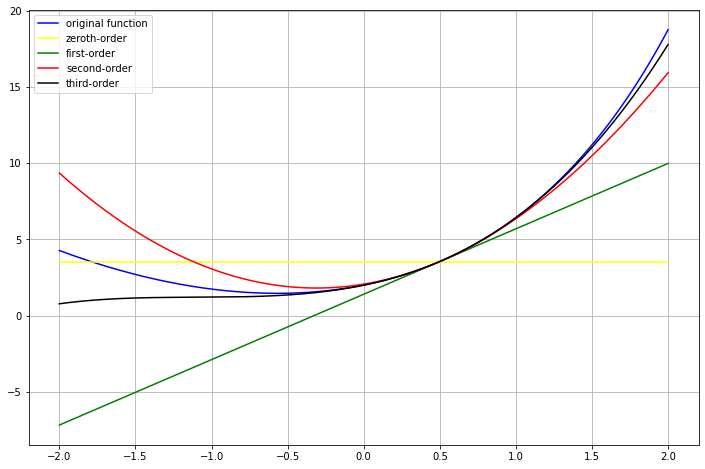

In [23]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)
plt.plot(x,y,color='b',label="original function")
plt.plot(x,y0,color='yellow',label="zeroth-order")
plt.plot(x,y1,color='g',label="first-order")
plt.plot(x,y2,color='r',label="second-order")
plt.plot(x,y3,color='black',label="third-order")
plt.legend(loc="upper left")
plt.grid()

## QUESTION 5

For real nxn matrices $C$, $D$, $E$, $F$, we want to compute,  

$(A+i.B) = (C + i.D)(E +i.F)$ with 3 matrix multiplications.  

Using distributive property,  

$$ K = (C+D).(E-F) = C.E - C.F + D.E - D.F (*)$$  

$$ M = C.F (*)$$  

$$ N = D.E (*)$$  

$$ K - M - N + i.(M-N)  = C.E - D.F + i.(C.F - D.E)$$ 

$$ K - M - N + i.(M-N)  = A + i.B$$   

(*) represents the operations with multiplication

In [24]:
def func(C,D,E,F):
    K = (C+D)@(E+F)
    M = C@F
    N = D@E
    return (K-M-N),(M-N)


## QUESTION 6

For function $\phi$ to be linear, it needs to satisfy,  
$$\phi(\alpha.x) = \alpha.\phi(x)$$  
for vector $x$ and any real coefficient $\alpha$.

Now let x be 3-vector $(-1, 1, 1)$ and $\alpha=-1$.  
With given inputs, we know that  

$$\phi(x) =\phi(-1, 1, 1) = 1$$ 

Then if $\phi$ is linear, 
$$\phi(\alpha.x) = \phi(1,-1,-1) = \alpha.\phi(x) = \alpha.1 = -1$$  must hold.

However, this is a contradiction since 
$$\phi(1,-1,-1)=1$$  

Thus, we conclude that $\phi$ can not be linear.